# Alucar - Analisando as vendas

In [1]:
import pandas as pd

In [2]:
alucar = pd.read_csv('Datas/alucar.csv', sep =',')

In [3]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [4]:
print(f'Quantidade de linhas e colunas: {alucar.shape}')

Quantidade de linhas e colunas: (24, 2)


In [5]:
print(f'Quantidade de dados nulos: {alucar.isna().sum().sum()}')

Quantidade de dados nulos: 0


In [6]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [7]:
#Convertendo o tipo de dados de uma variavel
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [8]:
import seaborn as sns
%matplotlib inline 
from matplotlib import pyplot as plt

<Axes: xlabel='mes', ylabel='vendas'>

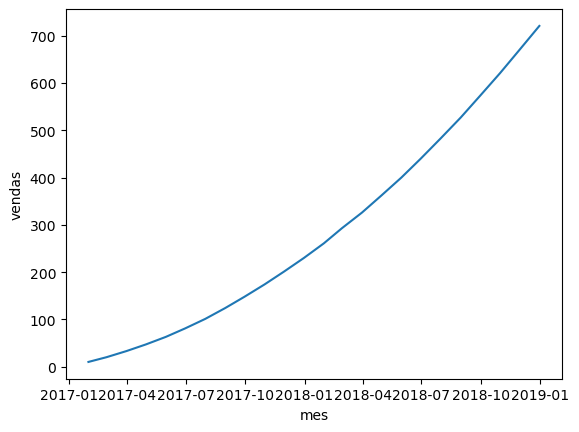

In [9]:
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)

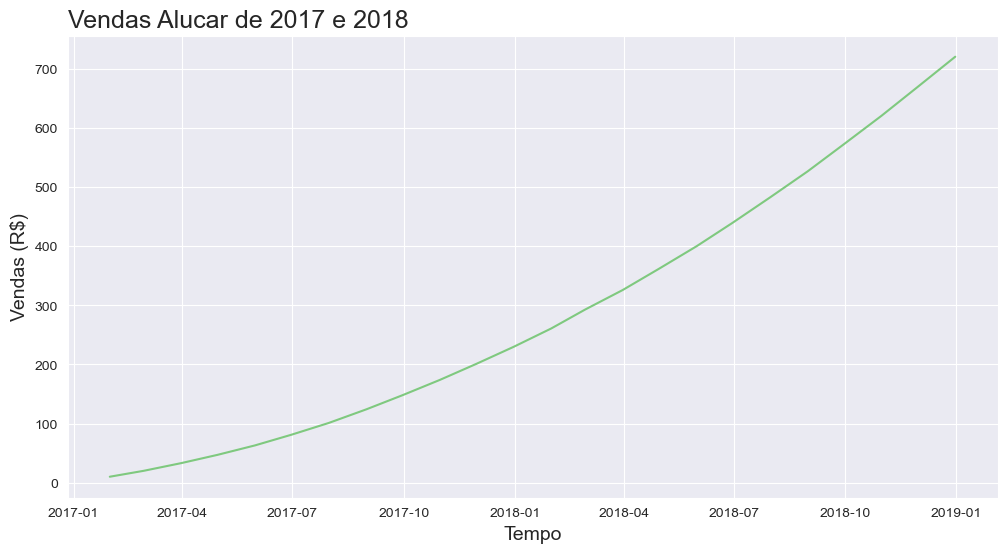

In [10]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
#tamanho do grafico
ax.figure.set_size_inches(12, 6)
#loc deixar o titulo em alguma posição
ax.set_title('Vendas Alucar de 2017 e 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Vendas (R$)', fontsize = 14)
ax = ax

In [11]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


### Criando um gráfico para mostrar o aumento de vendas a cada mês

In [12]:
#Criando uma nova coluna que será a (venda anterior - a venda posterior)
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


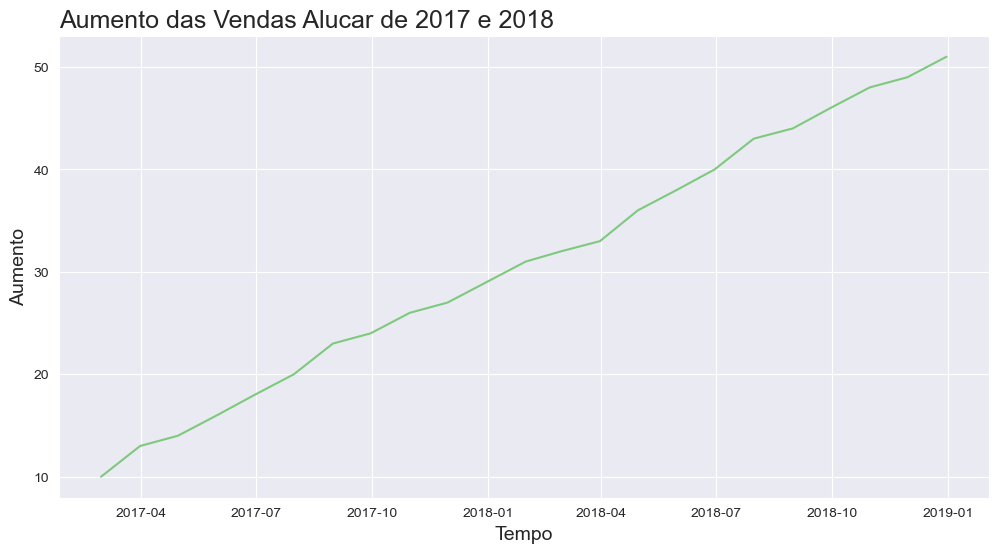

In [13]:
#Criando gráfico com relação com 'Aumento'
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'mes', y = 'aumento', data = alucar)
#tamanho do grafico
ax.figure.set_size_inches(12, 6)
#loc deixar o titulo em alguma posição
ax.set_title('Aumento das Vendas Alucar de 2017 e 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Aumento', fontsize = 14)
ax = ax

In [14]:
#Criando uma função para plotar um gráfico
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x = x, y = y, data = dataset)
    #tamanho do grafico
    ax.figure.set_size_inches(12, 6)
    #loc deixar o titulo em alguma posição
    ax.set_title(titulo, loc = 'left', fontsize = 18)
    ax.set_xlabel(labelx, fontsize = 14)
    ax.set_ylabel(labely, fontsize = 14)
    ax = ax

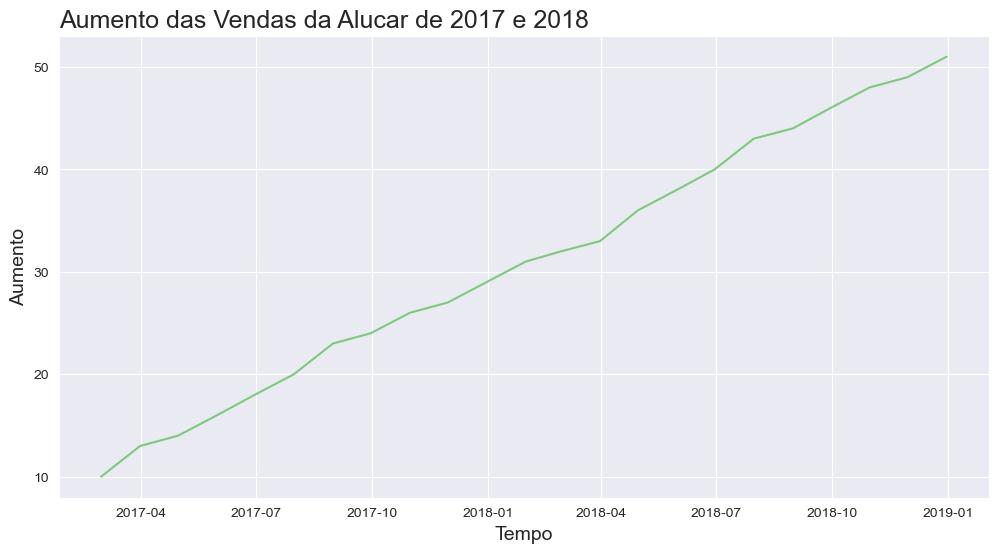

In [15]:
plotar('Aumento das Vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

### Criar um gráfico para ver a acelaração das vendas Mês a Mês

In [16]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


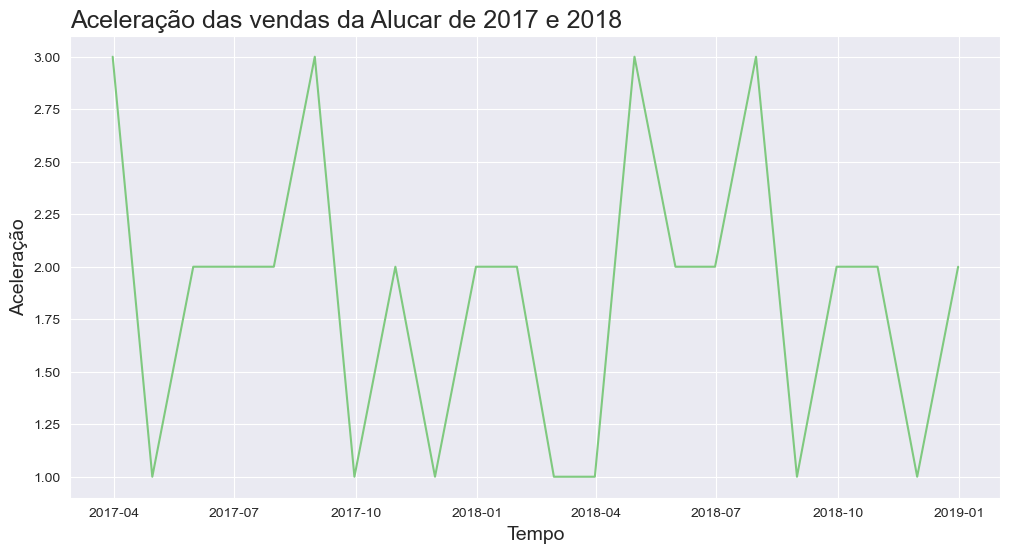

In [17]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

# Juntando todos esse gráficos

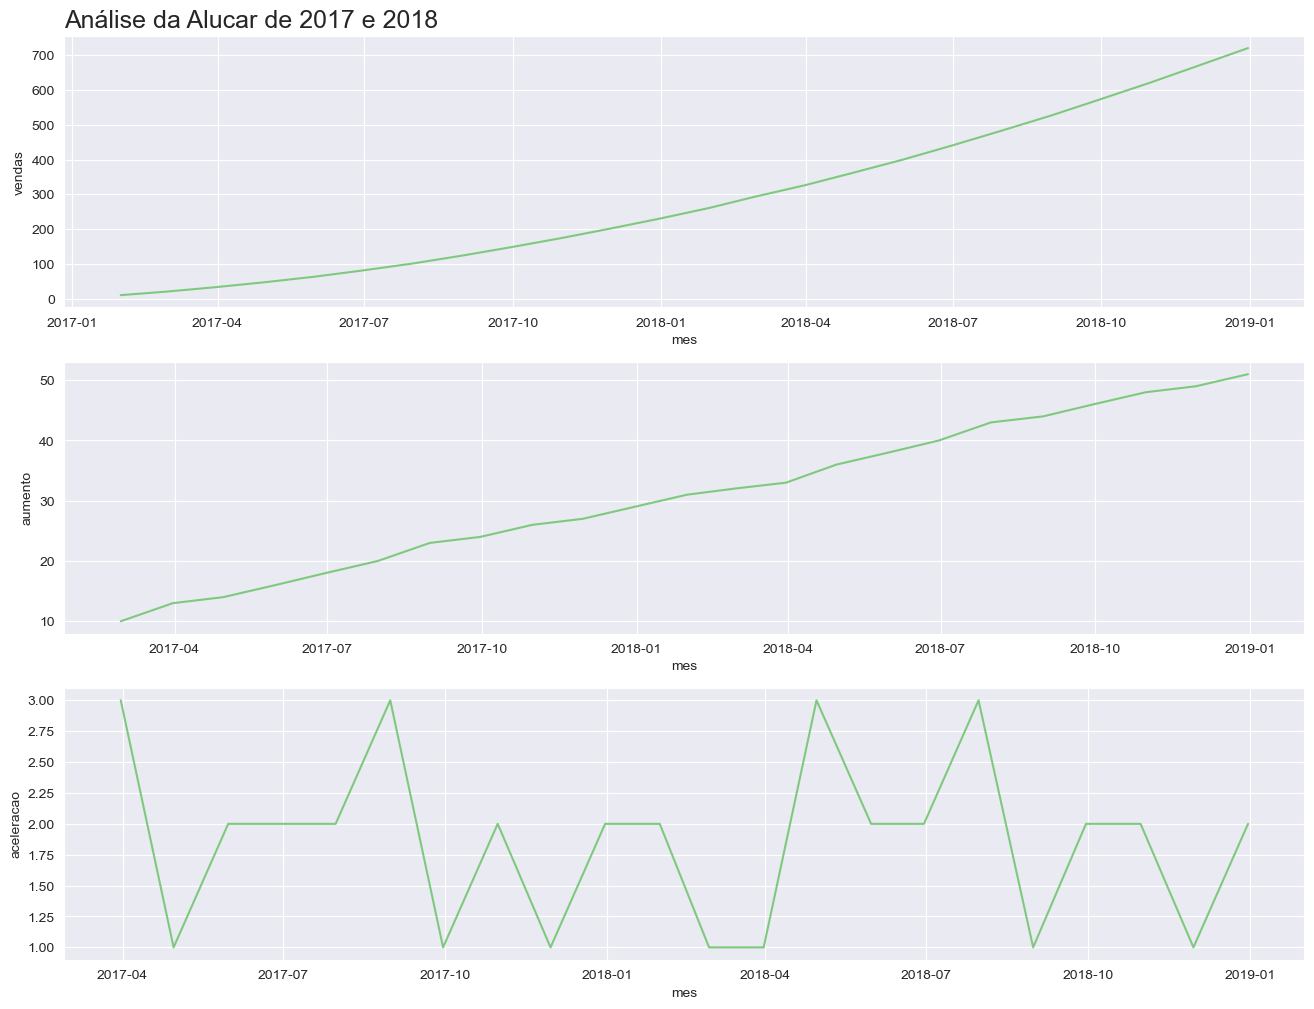

In [18]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Análise da Alucar de 2017 e 2018', fontsize = 18, loc = 'left')
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
plt.subplot(3,1,2)
sns.lineplot(x = 'mes', y = 'aumento', data = alucar)
plt.subplot(3,1,3)
sns.lineplot(x = 'mes', y = 'aceleracao', data = alucar)
ax = ax

In [19]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(titulo, fontsize = 18, loc = 'left')
    sns.lineplot(x = x, y = y1, data = dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x = x, y = y2, data = dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x = x, y = y3, data = dataset)
    ax = ax

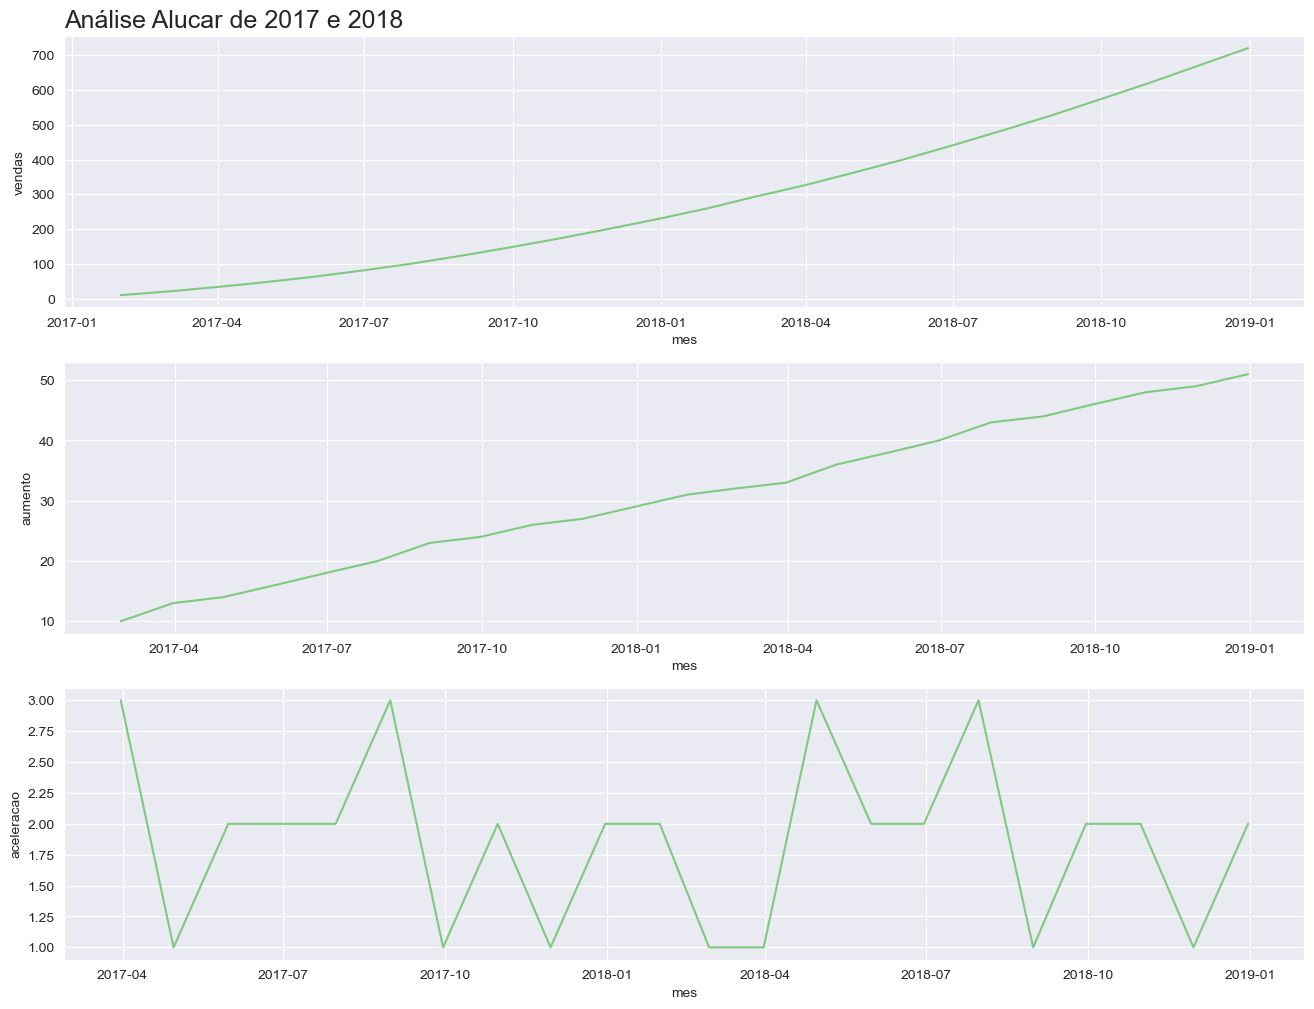

In [20]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise Alucar de 2017 e 2018')

# Autocorrelação

<img src = 'tabela_autocorrelacao.png'>

In [21]:
from pandas.plotting import autocorrelation_plot

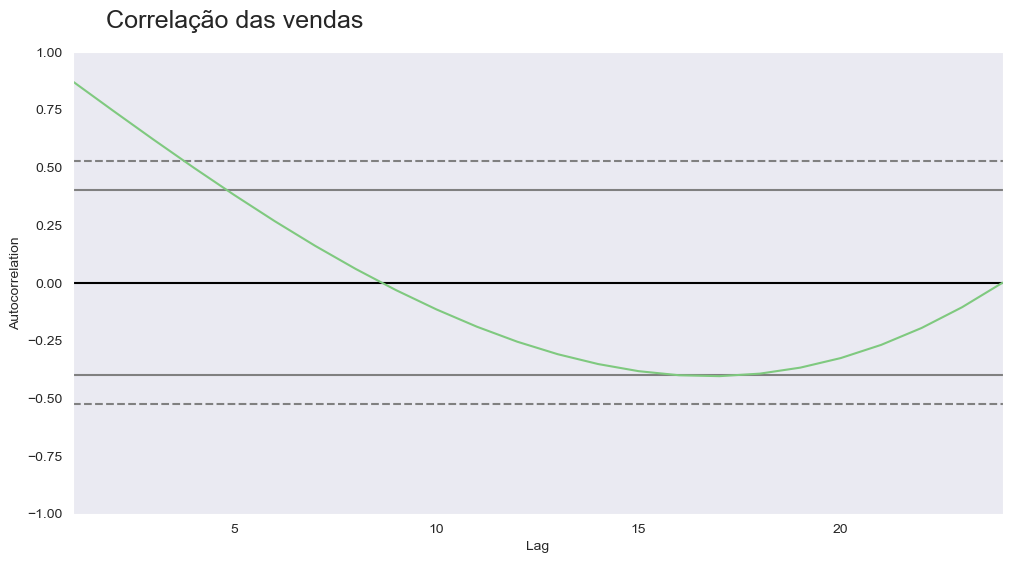

In [22]:
ax = plt.figure(figsize = [12,6])
ax.suptitle('Correlação das vendas', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

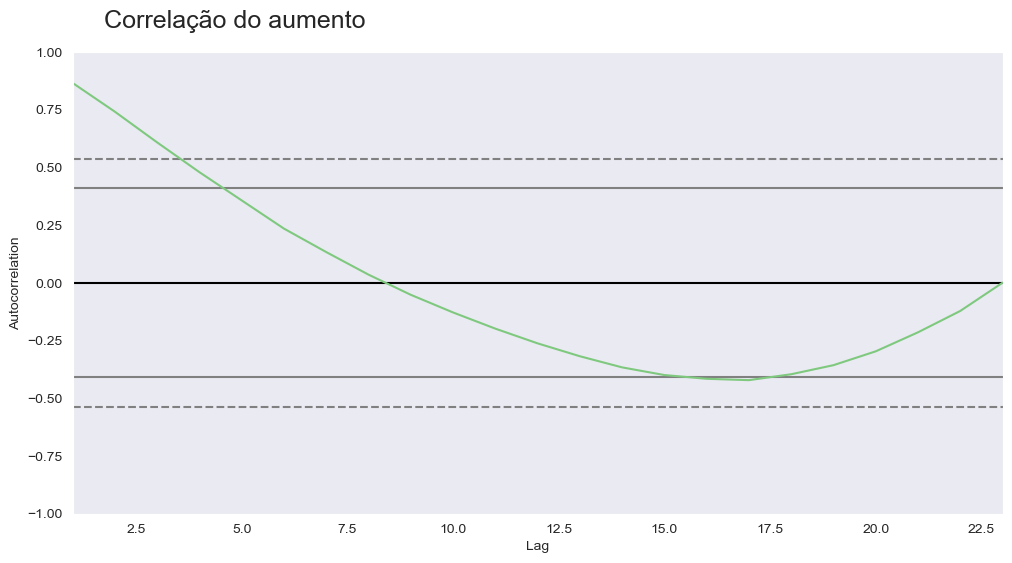

In [23]:
ax = plt.figure(figsize = [12,6])
ax.suptitle('Correlação do aumento', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

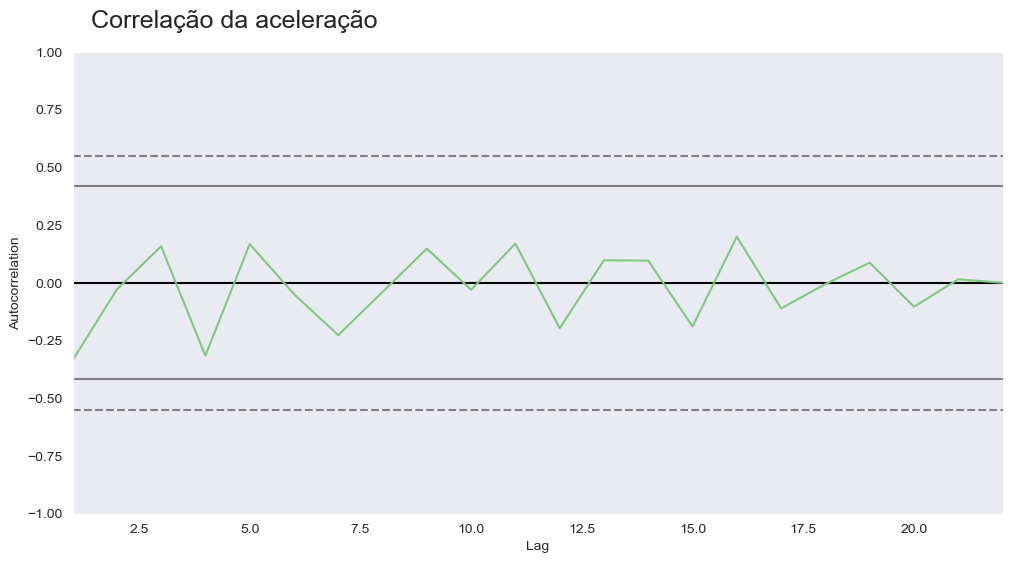

In [24]:
ax = plt.figure(figsize = [12,6])
ax.suptitle('Correlação da aceleração', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

# Alucar - Analisando os assinantes da Newsletter

In [25]:
assinantes = pd.read_csv('Datas/newsletter_alucar.csv', sep = ',')

In [26]:
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [27]:
print(f'Quantidade de linhas e colunas é {assinantes.shape}')
print(f'Quantidade de dados nulos é {assinantes.isna().sum().sum()}')

Quantidade de linhas e colunas é (24, 2)
Quantidade de dados nulos é 0


In [28]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [29]:
#Criando uma nova coluna para ver o crescimento de assinantes
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head(5)

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


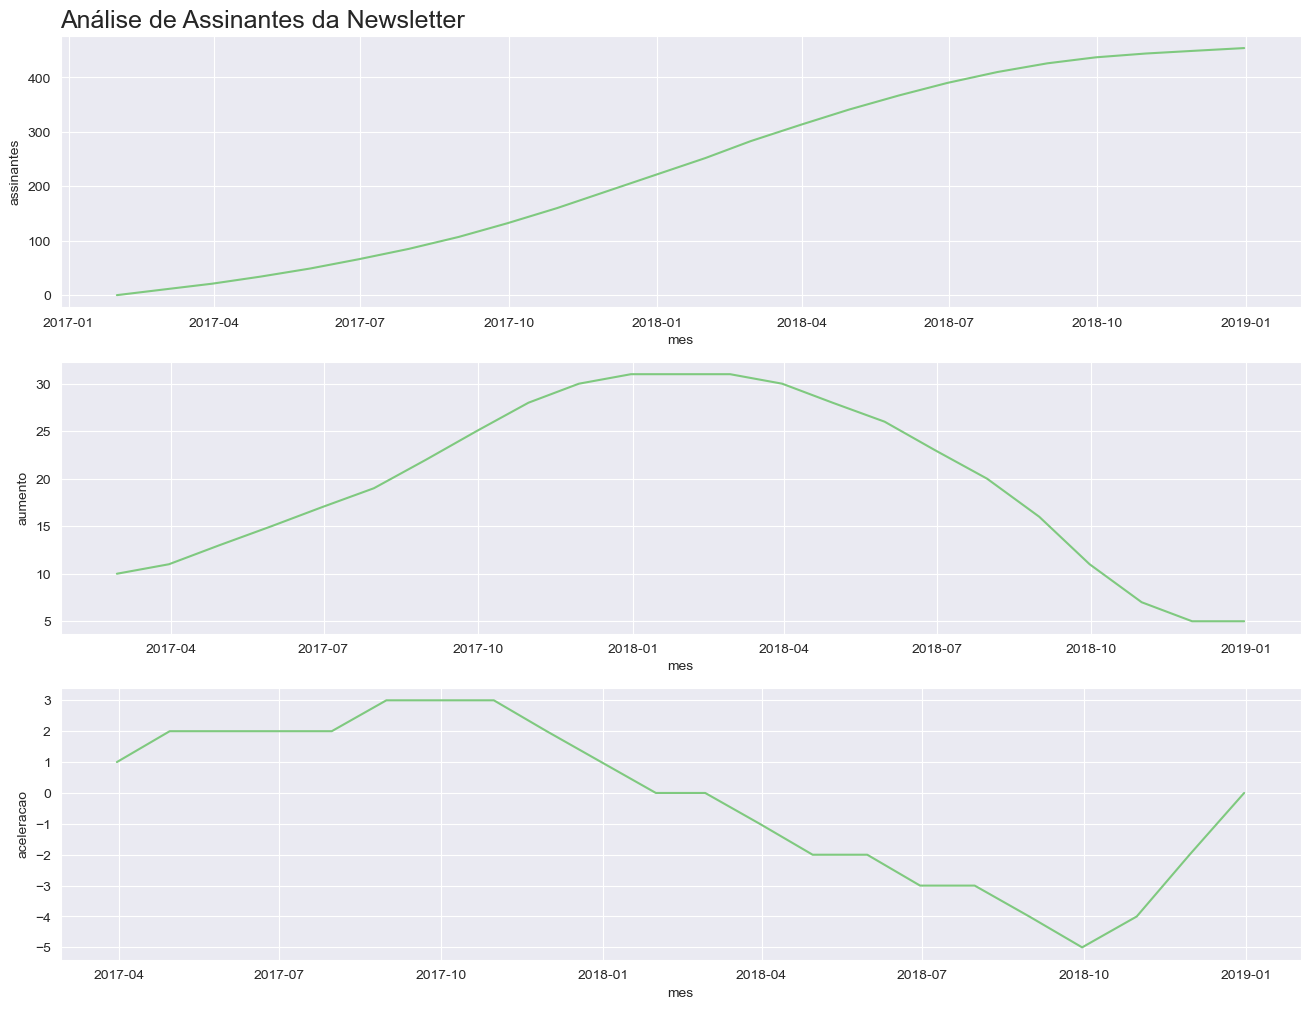

In [30]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de Assinantes da Newsletter')

# Análisando as Vendas - Chocolura

In [31]:
chocolura = pd.read_csv('Datas/chocolura.csv', sep =',')

In [32]:
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [33]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [34]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [35]:
print(f'Quantidade de linhas e colunas é {chocolura.shape}')
print(f'Quantidade de dados nulos é {chocolura.isna().sum().sum()}')

Quantidade de linhas e colunas é (24, 2)
Quantidade de dados nulos é 0


In [36]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


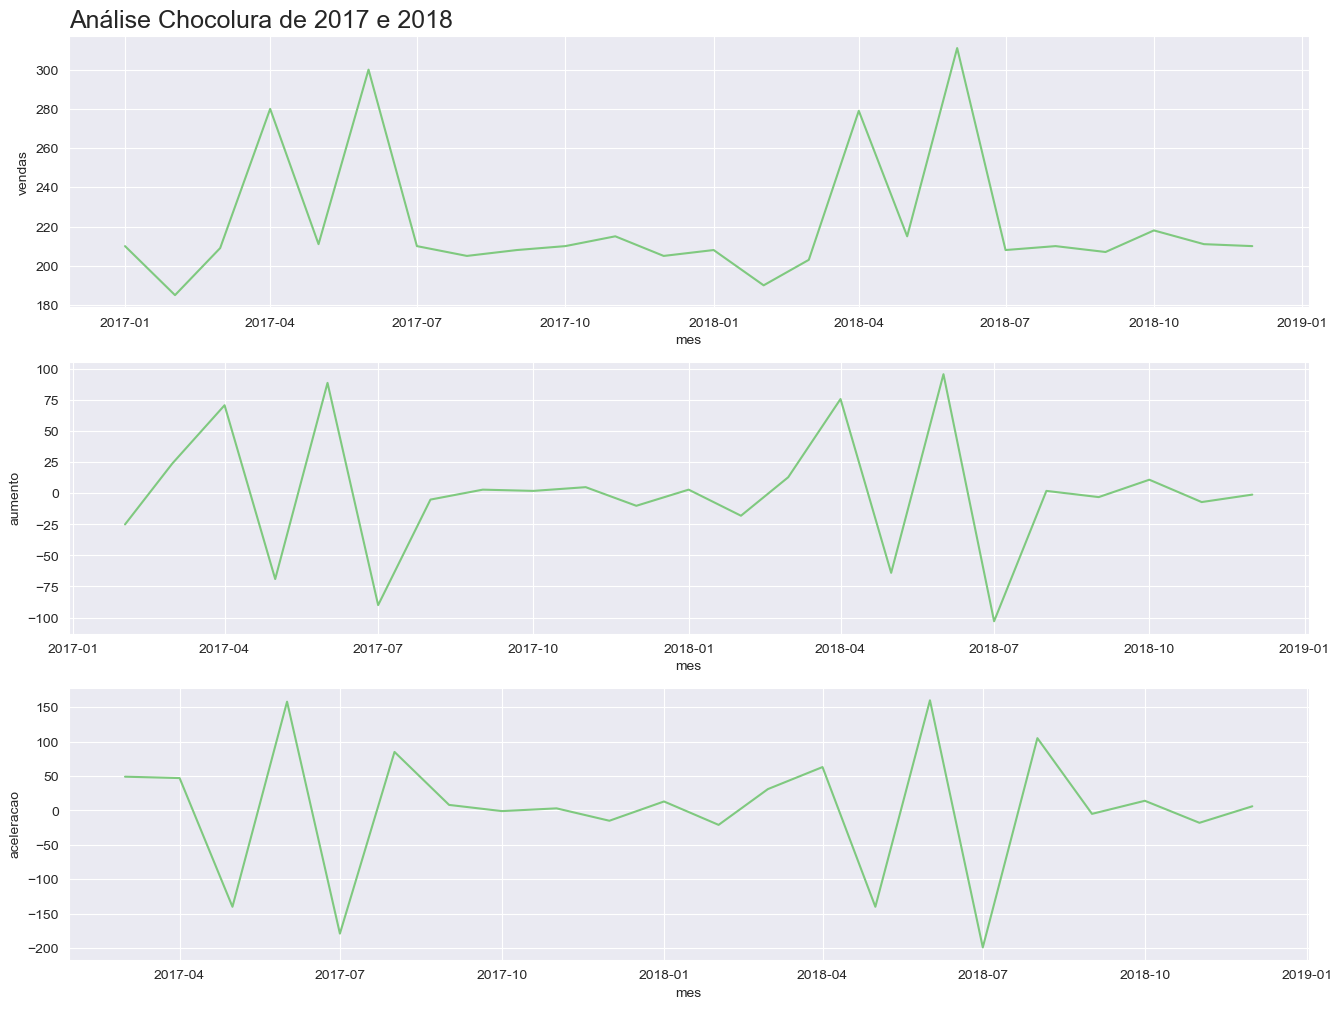

In [37]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise Chocolura de 2017 e 2018')

# Chocolura - Vendas de áreas (Outubro e Novembro)

In [38]:
vendas_por_dia = pd.read_csv('Datas/vendas_por_dia.csv', sep=',')

In [39]:
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [68]:
print(f'Quantidades de linhas e coluna é {vendas_por_dia.shape}')
print(f'Quantidade de dados nulos é {vendas_por_dia.isna().sum().sum()}')

Quantidades de linhas e coluna é (61, 2)
Quantidade de dados nulos é 0


In [ ]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

In [ ]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

In [ ]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de Vendas de Outubro e Novembro - Chocolura')

## **Analisando a Sazonalidade**

In [ ]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()

In [ ]:
vendas_por_dia.head()

In [ ]:
vendas_por_dia['dia_da_semana'].unique()

In [ ]:
dias_traduzidos = {
    'Monday' : 'Segunda',
    'Tuesday': 'Terca',
    'Wednesday' : 'Quarta',
    'Thursday' : 'Quinta',
    'Friday' : 'Sexta',
    'Saturday' : 'Sabado',
    'Sunday' : 'Domingo'
}

In [ ]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)

In [ ]:
vendas_por_dia.head()

### **Agrupando os dias**

In [ ]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')[['vendas', 'aumento', 'aceleracao']].mean().round()

In [ ]:
vendas_agrupadas

# Correlação das vendas diárias

In [ ]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação das vendas diárias', fontsize =  18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

In [ ]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize =  18, x = 0.325, y = 0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

In [ ]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize =  18, x = 0.325, y = 0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

# Cafelura - Análise de Vendas

In [ ]:
cafelura = pd.read_csv('Datas/cafelura.csv', sep =',')

In [ ]:
cafelura.head()

In [ ]:
cafelura.dtypes

In [ ]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

In [ ]:
print(f'Quantidade de linhas e colunas {cafelura.shape}')
print(f'Quantida de dados nulos {cafelura.isna().sum().sum()}')

In [ ]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

## Normalização de Time Series

In [ ]:
quantidade_de_dia_de_fds = pd.read_csv('Datas/dias_final_de_semana.csv', sep = ',')
quantidade_de_dia_de_fds.head()

In [ ]:
quantidade_de_dia_de_fds['quantidade_de_dias'].values

In [ ]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dia_de_fds['quantidade_de_dias'].values
cafelura.head()

In [ ]:
plotar('Vendas normalizadas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas Normalizadas', 'mes', 'vendas_normalizadas', cafelura)

In [ ]:
plt.figure(figsize= (12, 8))
ax = plt.subplot(2, 1, 1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize = 18)
sns.lineplot(x = 'mes', y = 'vendas', data = cafelura)
ax = plt.subplot(2, 1, 2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize = 18)
sns.lineplot(x = 'mes', y = 'vendas_normalizadas', data = cafelura)
ax = ax

# Statesmodels

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

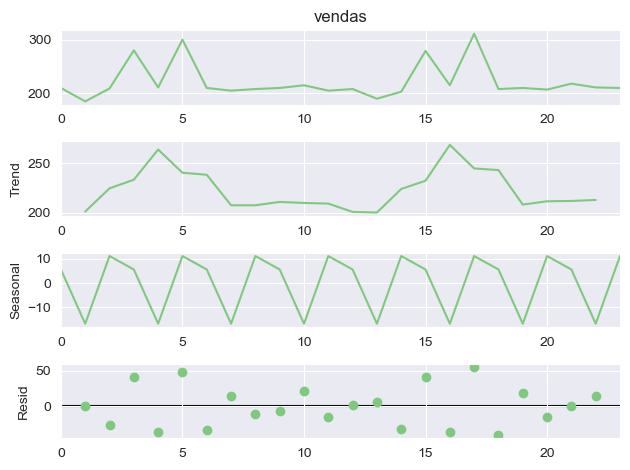

In [55]:
resultado = seasonal_decompose(chocolura['vendas'], period = 3)
ax = resultado.plot()

In [56]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [57]:
data = ({
    'observacao' : observacao,
    'tendencia' : tendencia,
    'sazonalidade' : sazonalidade,
    'ruido' : ruido
})

In [61]:
resultado = pd.DataFrame(data)

In [64]:
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


In [69]:
def plot_comparacao_stats(x, y1, y2, y3, y4, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(4, 1, 1)
    ax.set_title(titulo, fontsize = 18, loc = 'left')
    sns.lineplot(x = x, y = y1, data = dataset)
    plt.subplot(4,1,2)
    sns.lineplot(x = x, y = y2, data = dataset)
    plt.subplot(4,1,3)
    sns.lineplot(x = x, y = y3, data = dataset)
    plt.subplot(4,1,4)
    sns.lineplot(x = x, y = y4, data = dataset)
    ax = ax

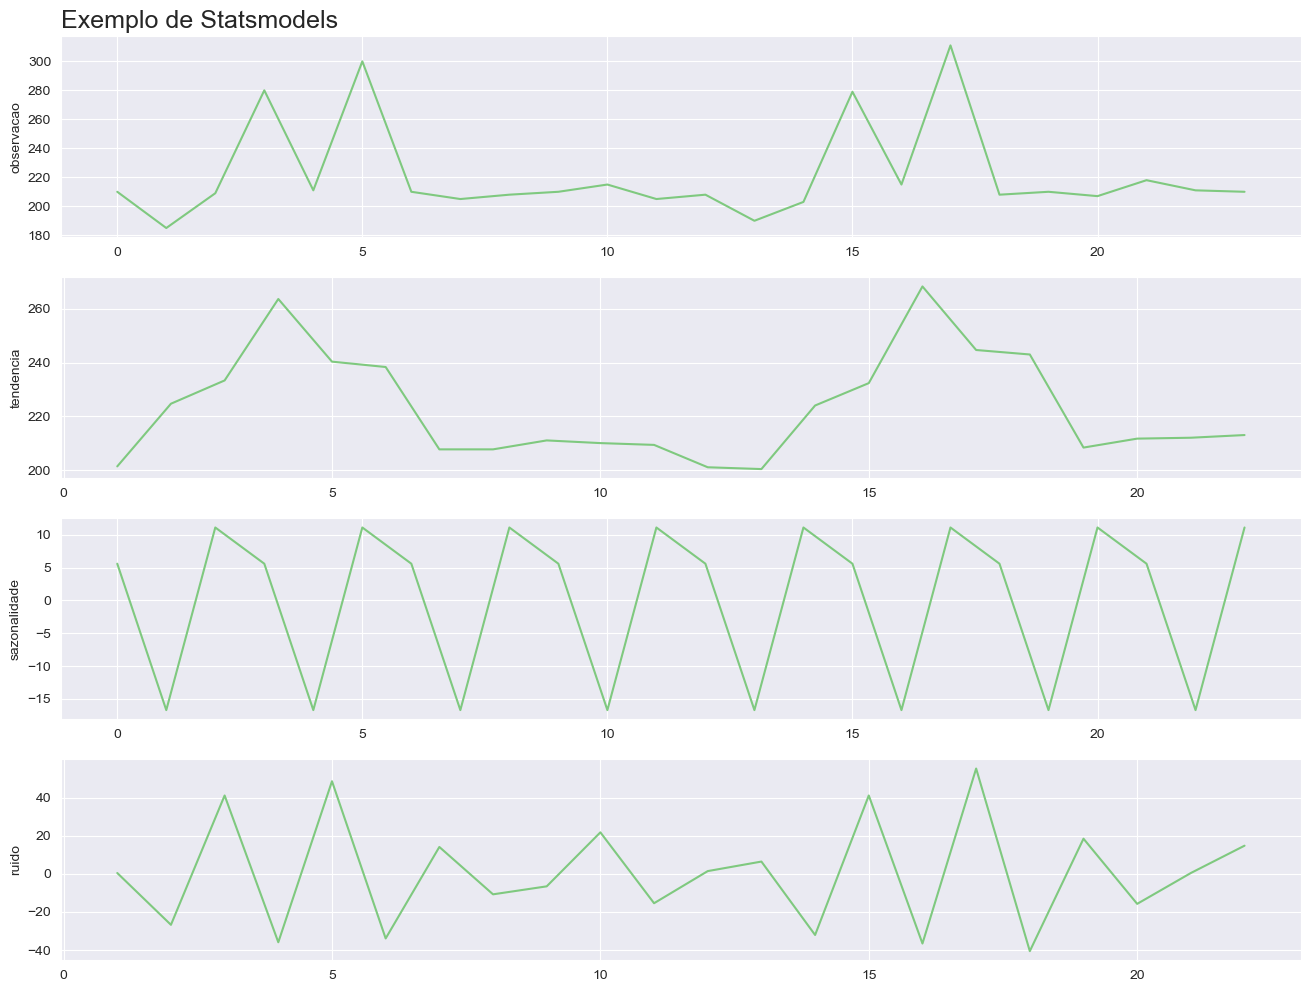

In [70]:
plot_comparacao_stats(resultado.index, 'observacao', 'tendencia', 'sazonalidade', 'ruido', resultado, 'Exemplo de Statsmodels')

# Alucel - Análise de Vendas

In [71]:
alucel = pd.read_csv('Datas/alucel.csv', sep = ',')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [72]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [74]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [79]:
print(f'Quantidade de colunas e linha é {alucel.shape}')
print(f'Quantia de valores nulos é {alucel.isna().sum().sum()}')

Quantidade de colunas e linha é (61, 2)
Quantia de valores nulos é 0


In [80]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


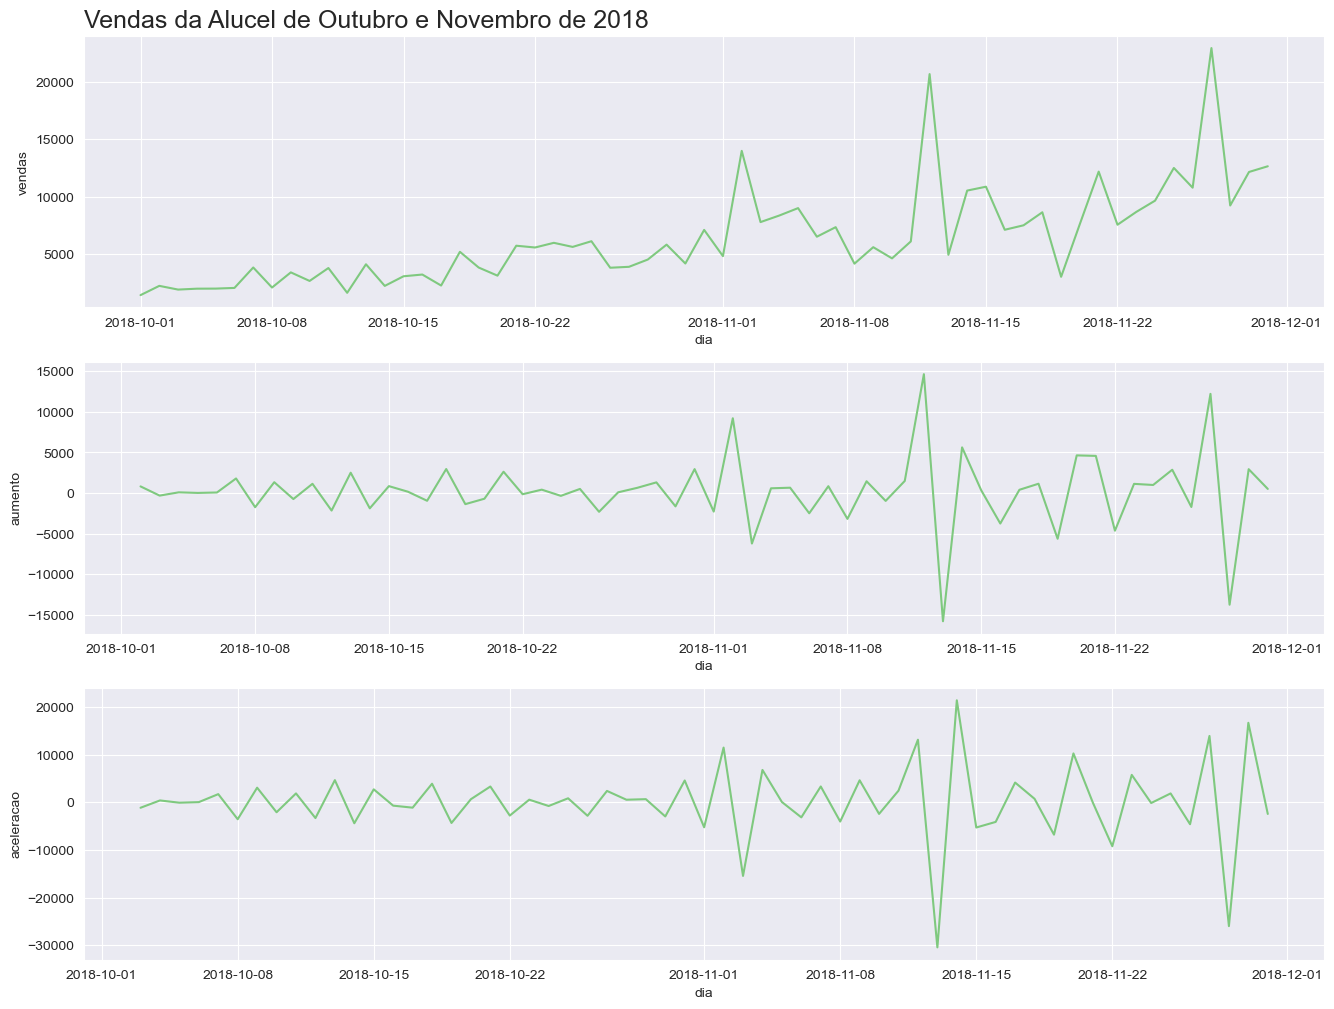

In [86]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Vendas da Alucel de Outubro e Novembro de 2018')

### **Média Móvel**

In [92]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean().round(2)

In [94]:
alucel.head(10)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.86
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.83
8,2018-10-09,3365.58,1325.99,3079.47,2421.38
9,2018-10-10,2616.12,-749.46,-2075.45,2529.35


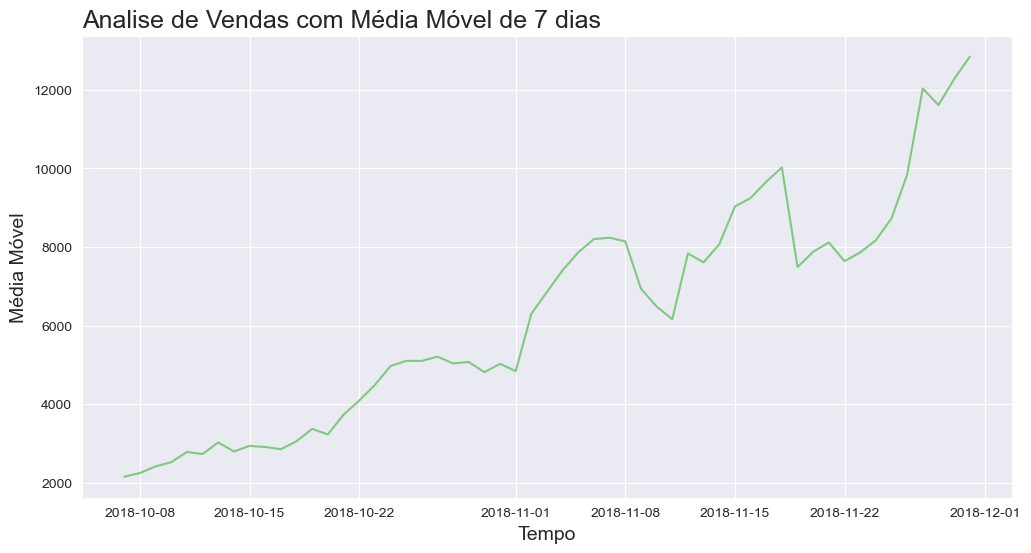

In [95]:
plotar('Analise de Vendas com Média Móvel de 7 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

In [96]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean().round(2)

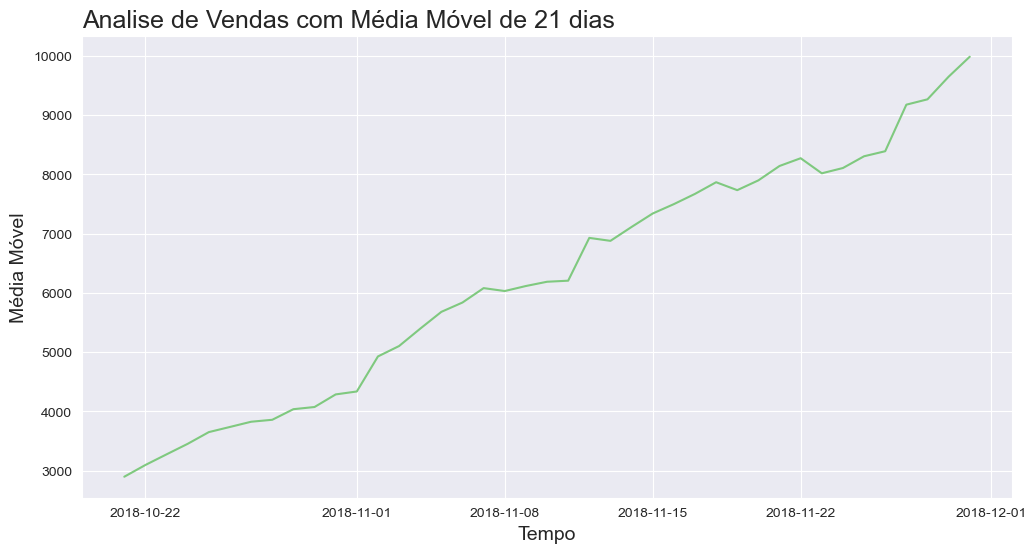

In [97]:
plotar('Analise de Vendas com Média Móvel de 21 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel_21', alucel)

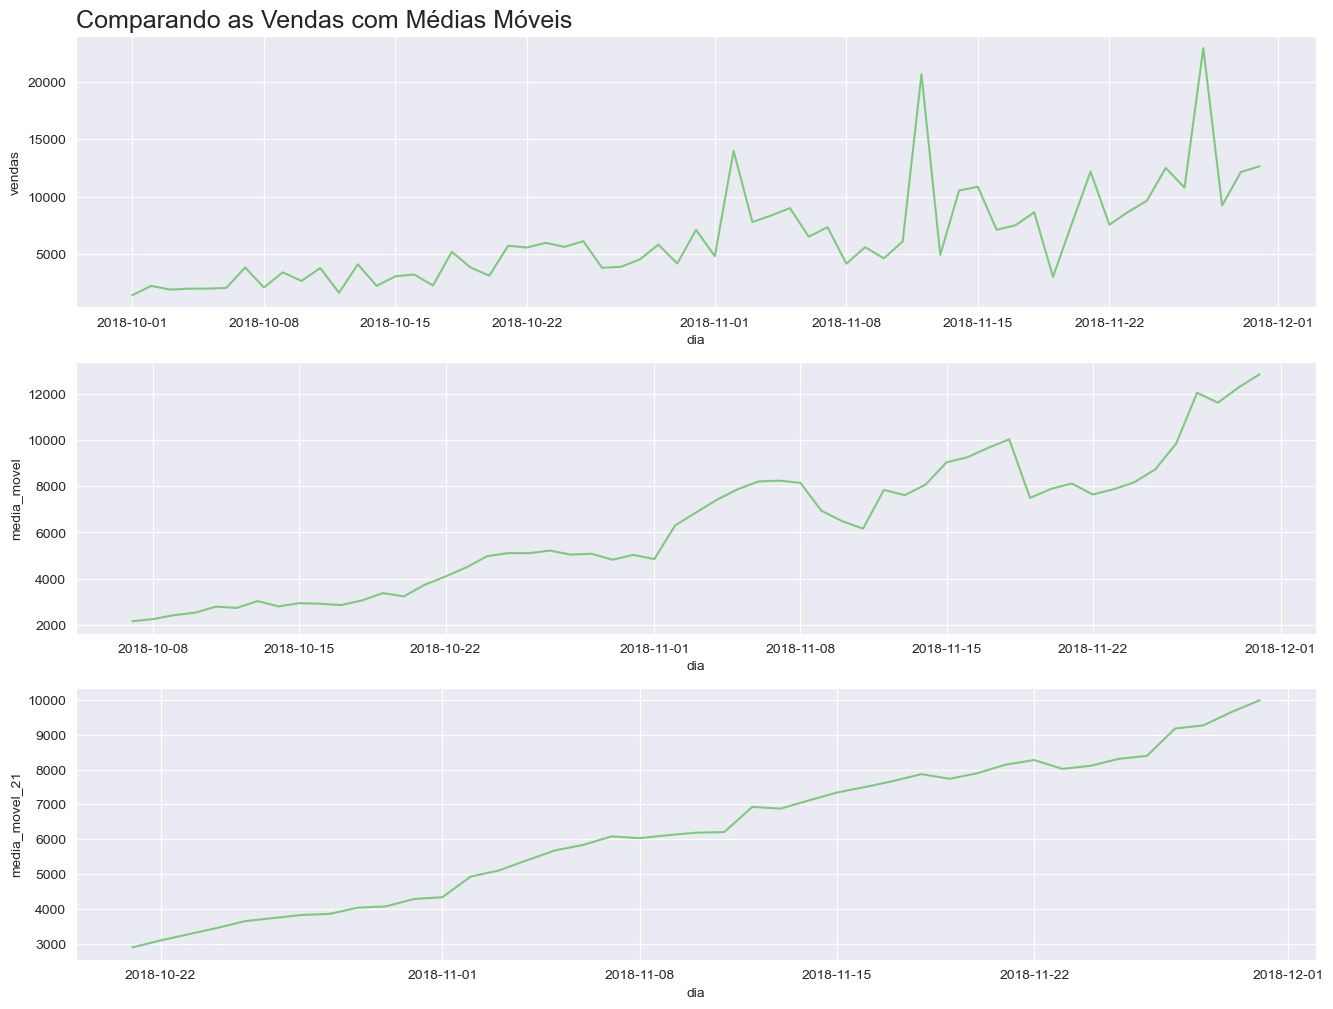

In [98]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando as Vendas com Médias Móveis')